<a href="https://colab.research.google.com/github/goodwiins/CSCI358_LM/blob/main/9_16_gd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)
df_california = california.frame
df_california.columns = [
    "median_income",
    "house_age",
    "avg_rooms",
    "avg_bedrooms",
    "population",
    "avg_occupants",
    "latitude",
    "longitude",
    "median_house_value"
]
df_california.head()

,median_income,house_age,avg_rooms,avg_bedrooms,population,avg_occupants,latitude,longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
df_california.shape

(20640, 9)

In [3]:
X = df_california.iloc[:,:-1]
y = df_california.iloc[:,-1]
X.head()

,median_income,house_age,avg_rooms,avg_bedrooms,population,avg_occupants,latitude,longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

,median_house_value
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train.shape,X_test.shape

((15480, 8), (5160, 8))

In [6]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [12]:
X_train[:4]


array([[ 1.        ,  0.12622544, -0.29326886,  0.4172093 ,  0.1464258 ,
        -0.53925782, -0.00238663,  0.79199604, -0.53574499],
       [ 1.        ,  1.06773144,  1.85076912,  0.89076872, -0.02445989,
        -0.73458582, -0.04503312,  1.02588928, -1.32893329],
       [ 1.        ,  1.49564565, -0.92853937,  0.26137736, -0.26485429,
         0.10749489, -0.00737351, -0.93413605,  0.9558481 ],
       [ 1.        , -1.7524711 , -1.00794818, -0.35408966,  0.80785045,
        -1.23983424, -0.21151968, -0.74702146,  0.56673686]])

In [9]:
import numpy as np
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

X_train[:4]

array([[ 1.        ,  0.12622544, -0.29326886,  0.4172093 ,  0.1464258 ,
        -0.53925782, -0.00238663,  0.79199604, -0.53574499],
       [ 1.        ,  1.06773144,  1.85076912,  0.89076872, -0.02445989,
        -0.73458582, -0.04503312,  1.02588928, -1.32893329],
       [ 1.        ,  1.49564565, -0.92853937,  0.26137736, -0.26485429,
         0.10749489, -0.00737351, -0.93413605,  0.9558481 ],
       [ 1.        , -1.7524711 , -1.00794818, -0.35408966,  0.80785045,
        -1.23983424, -0.21151968, -0.74702146,  0.56673686]])

In [ ]:
w_normal = np.linalg.pinv(X_train)@y_train
w_normal

array([ 2.06794710e+00,  8.21940963e-01,  1.24192650e-01, -2.65213560e-01,
        3.07597824e-01,  1.45312767e-03, -2.94024292e-02, -8.93767940e-01,
       -8.63455985e-01])

## Gradient Descent

The following cell gives a bare-bones gradient descent with a fixed number of iterations.

Observe that the result is basically the same as `w_normal`.

In [ ]:
np.random.seed(42)
w = np.random.rand(X_train.shape[1])
eta = 0.1
for i in range(300):
    gradJ = 2/X_train.shape[0]*X_train.T@(X_train@w-y_train)
    w = w-eta*gradJ

In [ ]:
w

array([ 2.0679471 ,  0.84011741,  0.12941132, -0.29774563,  0.33349735,
        0.00316051, -0.02977973, -0.8393753 , -0.81100426])

Final train MSE: 0.5272
Final test  MSE: 0.5179


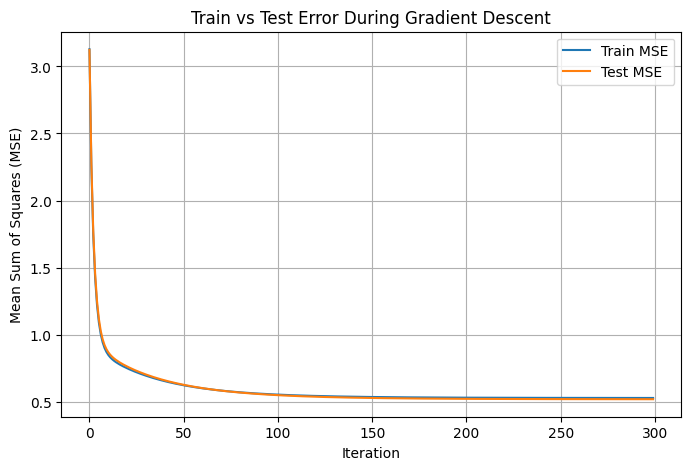

In [ ]:
import matplotlib.pyplot as plt

def mse(X, y, w):
    return np.mean((X @ w - y)**2)

np.random.seed(42)
w = np.random.rand(X_train.shape[1])
eta = 0.1

train_mse = []
test_mse  = []

for i in range(300):
    # gradient of MSE: (2/n) X^T (Xw - y)
    gradJ = (2 / X_train.shape[0]) * X_train.T @ (X_train @ w - y_train)
    w = w - eta * gradJ

    # track errors after this update
    train_mse.append(mse(X_train, y_train, w))
    test_mse.append(mse(X_test,  y_test,  w))

# Optional: final values
print(f"Final train MSE: {train_mse[-1]:.4f}")
print(f"Final test  MSE: {test_mse[-1]:.4f}")
plt.figure(figsize=(8,5))
plt.plot(train_mse, label="Train MSE")
plt.plot(test_mse, label="Test MSE")
plt.xlabel("Iteration")
plt.ylabel("Mean Sum of Squares (MSE)")
plt.title("Train vs Test Error During Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import r2_score

yhat_test = X_test@w

r2_score(y_test,yhat_test)

0.6128782258395493

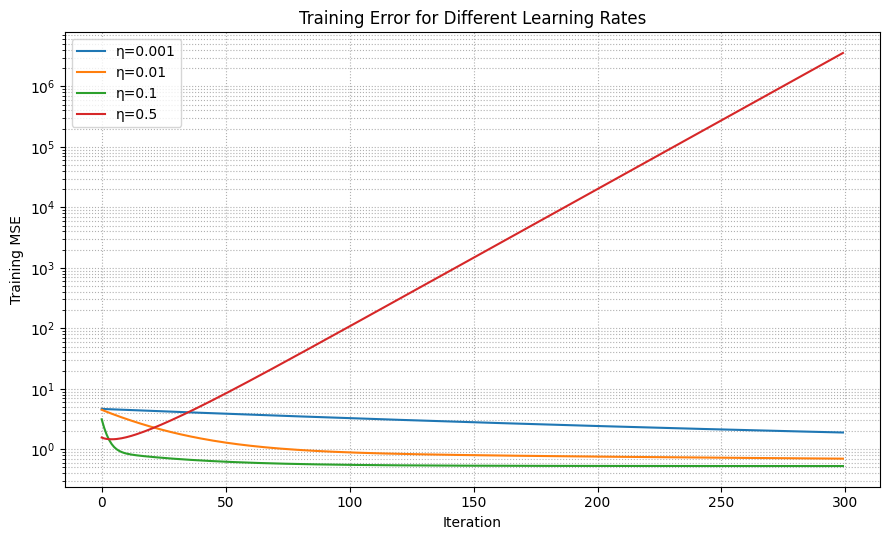

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mse(X, y, w):
    r = X @ w - y
    return float(np.mean(r*r))

def run_gd(Xtr, ytr, eta, n_iter=300, init_w=None):
    rng = np.random.default_rng(42)
    w = (init_w.copy() if init_w is not None else rng.random(Xtr.shape[1]))
    train_curve = []
    n = Xtr.shape[0]

    for _ in range(n_iter):
        grad = (2.0/n) * (Xtr.T @ (Xtr @ w - ytr))
        w -= eta * grad
        tr = mse(Xtr, ytr, w)
        train_curve.append(tr)

        if not np.isfinite(tr) or tr > 1e20:  # divergence guard
            break

    return np.array(train_curve)

# ---- choose learning rates ----
etas = [1e-3, 1e-2, 1e-1, 0.5]

# shared initialization for fair comparison
np.random.seed(42)
init_w = np.random.rand(X_train.shape[1])

results = {}
for eta in etas:
    tr = run_gd(X_train, y_train, eta, n_iter=300, init_w=init_w)
    results[eta] = tr

# ---- plot training error only ----
plt.figure(figsize=(9,5.5))
for eta, tr in results.items():
    plt.plot(tr, label=f"η={eta}")

plt.xlabel("Iteration")
plt.ylabel("Training MSE")
plt.title("Training Error for Different Learning Rates")
plt.yscale("log")   # log scale highlights convergence speed
plt.legend()
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()


## Stopping Criteria

Here we experiment with stopping criteria other than a fixed number of iterations.

First we try stopping based on loss tolerance.

#### Loss tolerance stopping

$$
|J_{i+1}-J_{i}| < \epsilon
$$

Really the code below would have a "max iter" limit to stop an infinite loop.

In [ ]:
np.random.seed(42)
w = np.random.rand(X_train.shape[1])
eta = 0.1
epsilon = 1/10**5
J_old = 10**9
iterations = 0
while True:
    iterations += 1
    gradJ = 2/X_train.shape[0]*X_train.T@(X_train@w-y_train)
    w = w-eta*gradJ
    r = X_train @ w - y_train
    J_new = float(np.mean(r*r))
    if np.abs(J_old - J_new)<epsilon:
        break
    J_old = J_new
mse(X_test,y_test,w), iterations

(0.5180683194811012, 281)

#### Validation error monitoring

Split off a validation set.

Track validation loss each iteration.

Stop when validation loss hasn’t improved for k iterations (“patience”).

Helps prevent overfitting.

Common in deep learning.

In [ ]:
X_train2,X_val,y_train2,y_val = train_test_split(X_train,y_train)

X_train2.shape,X_val.shape,X_test.shape

((11610, 9), (3870, 9), (5160, 9))

In [ ]:
np.random.seed(42)
w = np.random.rand(X_train.shape[1])
eta = 0.1
epsilon = 1/10**5
iterations = 0
patience = 10
J_vals = list(range(-patience,0))
while True:
    iterations += 1
    gradJ = 2/X_train2.shape[0]*X_train2.T@(X_train2@w-y_train2)
    w = w-eta*gradJ
    r = X_val@ w - y_val
    J_val = float(np.mean(r*r))
    J_vals.append(J_val)
    if np.std(J_vals[-10:]) < epsilon:
        break
mse(X_test,y_test,w), iterations

(0.5177710424659561, 328)

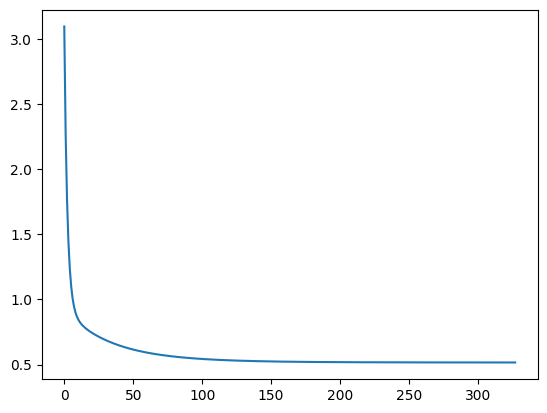

In [ ]:
plt.plot(J_vals[10:])

### The Learning Schedule: Changing $\eta$ adaptively

There are many policies we could use for changing $\eta$ as the GD process runs.


Intuitively we want to "get close to the optimum" fast and then take smaller steps to find the true optimum as exactly as possible.

Below we show the "step decay" method which halves $\eta$ every 50 steps.


In [ ]:
np.random.seed(42)
w = np.random.rand(X_train.shape[1])
eta = 0.1
for i in range(1,400):
    gradJ = 2/X_train.shape[0]*X_train.T@(X_train@w-y_train)
    w = w-eta*gradJ
    if i%50 == 0 :
        eta = eta/2
mse(X_test,y_test,w)

0.5492003954716709

### Inverse scaling

Another policy is

$$
\eta = \frac{\eta_0}{1+\lambda t}
$$

In [ ]:
np.random.seed(42)
w = np.random.rand(X_train.shape[1])
eta_0 = 0.1
eta = eta_0
for i in range(1,400):
    gradJ = 2/X_train.shape[0]*X_train.T@(X_train@w-y_train)
    w = w-eta*gradJ
    eta = eta_0/(1+2*i)
mse(X_test,y_test,w)

1.5408957483054397

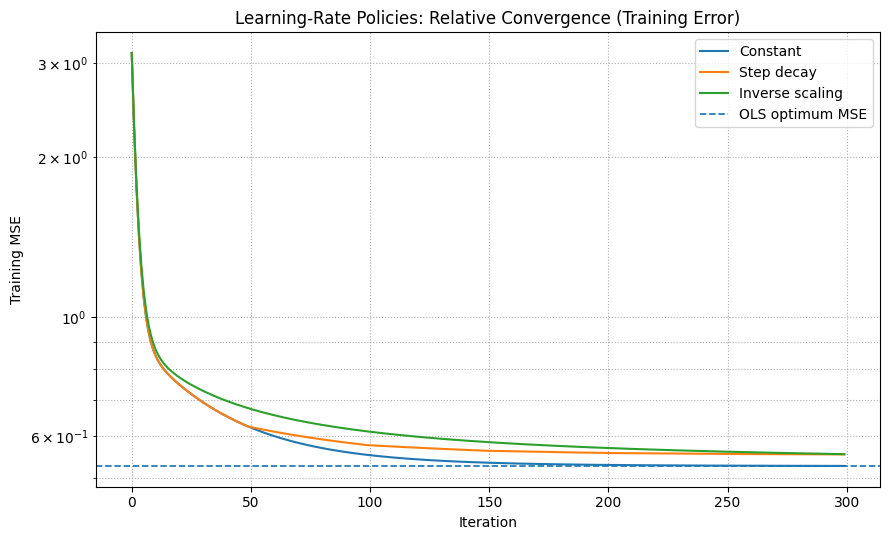

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Utilities
# --------------------------
def mse(X, y, w):
    r = X @ w - y
    return float(np.mean(r * r))

def ols_optimum_mse(X, y):
    # Closed-form OLS solution for reference line
    w_ols, *_ = np.linalg.lstsq(X, y, rcond=None)
    return mse(X, y, w_ols)

# --------------------------
# Learning-rate policies
# --------------------------
def constant_lr(eta0):
    # eta_t = eta0
    return lambda t: eta0

def step_decay_lr(eta0, gamma=0.5, step_size=50):
    # eta_t = eta0 * gamma^{floor(t / step_size)}
    def f(t):
        k = t // step_size
        return eta0 * (gamma ** k)
    return f

def inverse_scaling_lr(eta0, lam=0.01):
    # eta_t = eta0 / (1 + lam * t)
    return lambda t: eta0 / (1.0 + lam * t)

# --------------------------
# Gradient Descent runner (training curve only)
# --------------------------
def run_gd(X, y, n_iter, lr_schedule, init_w=None, seed=42):
    rng = np.random.default_rng(seed)
    w = init_w.copy() if init_w is not None else rng.random(X.shape[1])
    n = X.shape[0]
    curve = []

    for t in range(n_iter):
        # Full-batch MSE gradient: (2/n) X^T (Xw - y)
        grad = (2.0 / n) * (X.T @ (X @ w - y))
        eta_t = lr_schedule(t)
        w -= eta_t * grad

        tr = mse(X, y, w)
        curve.append(tr)

        # basic divergence guard
        if not np.isfinite(tr) or tr > 1e25:
            break

    return np.array(curve)

# --------------------------
# Main comparison
# --------------------------
# Hyperparameters you may tweak
N_ITER = 300
ETA0   = 0.1

# Build schedules
policies = {
    "Constant":        constant_lr(ETA0),
    "Step decay":      step_decay_lr(ETA0, gamma=0.5, step_size=50),
    "Inverse scaling": inverse_scaling_lr(ETA0, lam=0.02),
}

# Shared initialization for fairness
np.random.seed(42)
init_w = np.random.rand(X_train.shape[1])

# Run
curves = {}
for name, sched in policies.items():
    curves[name] = run_gd(X_train, y_train, N_ITER, sched, init_w=init_w, seed=42)

# Reference: OLS optimum MSE
mse_star = ols_optimum_mse(X_train, y_train)

# --------------------------
# Plot (training error only)
# --------------------------
plt.figure(figsize=(9,5.5))
for name, c in curves.items():
    plt.plot(c, label=name)

plt.axhline(mse_star, linestyle="--", linewidth=1.25, label="OLS optimum MSE")

plt.xlabel("Iteration")
plt.ylabel("Training MSE")
plt.title("Learning-Rate Policies: Relative Convergence (Training Error)")
plt.yscale("log")                 # makes convergence speed differences obvious
plt.grid(True, which="both", ls=":")
plt.legend()
plt.tight_layout()
plt.show()


## Stochastic Gradient Descent

The error function $J$ can be thought of as the average of a simpler function called the **loss**:

$$
J(\bar{w}) = \frac{1}{n}\sum_{i=1}^n\ell(\bar{x}^{(i)},y^{(i)})
$$

Examples:

* **Linear regression**:
  $\ell(\bar{w}; x, y) = (y - x^\top \bar{w})^2$

* **Logistic regression**:
  $\ell(\bar{w}; x, y) = \log\!\big(1 + e^{-y \, x^\top \bar{w}}\big)$

* **Hinge loss (SVM)**:
  $\ell(\bar{w}; x, y) = \max\{0,\, 1 - y \, x^\top \bar{w}\}$


The idea behind SGD is that we can converge faster if at each iteration we only evaluate the gradient for the **loss** function at a randomly chosen point.

On average we will go in the right direction, and we don't have to look at every point in the dataset.

![img](https://ml-explained.com/_ipx/sizes_xs:320px%20md:768px%20lg:1024px,w_1536,f_png/articles/gradient-descent-explained/variations_comparison.png)
